# WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv 
import os
from pprint import pprint
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
np.random.seed(123)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create the base url 
base_url = f'http://api.openweathermap.org/data/2.5/weather?&APPID={weather_api_key}&units=imperial&q='

#city = cities[0]
response_json = requests.get(base_url + city).json()

# Create DataFrame for API Calls
data_df = pd.DataFrame(columns = ["City", "Latitude", "Longitude", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])


print("Begining Data Retrieval")
print("--------------------------")


i = 1

# Looping through all the cities
for city in cities:
    print(f"processing city {i} | {city}")
    
    try:
        response_json = requests.get(base_url + city).json() 
        
         
        data_df = data_df.append({'City_name':response_json["name"],
                                'Latitude':response_json["coord"]["lat"],
                                'Longitude':response_json["coord"]["lon"],
                                'Max Temp':response_json["main"]["temp_max"],
                                'Cloudiness':response_json["clouds"]["all"],
                                'Humidity':response_json["main"]["humidity"],
                                'Wind Speed':response_json["wind"]["speed"],
                                'Country':response_json["sys"]["country"],
                                'Date':response_json["dt"] 
                                }, ignore_index = True)
        
    except KeyError: 
        print ("City not found. Skipping...")
        pass
    i += 1
    
    
data_df


Begining Data Retrieval
--------------------------
processing city 1 | camacha
processing city 2 | mataura
processing city 3 | hobart
processing city 4 | bargal
City not found. Skipping...
processing city 5 | manacor
processing city 6 | sao jose da coroa grande
processing city 7 | barrow
processing city 8 | levelland
processing city 9 | ambon
processing city 10 | morondava
processing city 11 | rikitea
processing city 12 | ogden
processing city 13 | alta floresta
processing city 14 | port alfred
processing city 15 | ongandjera
processing city 16 | bastia
processing city 17 | new norfolk
processing city 18 | mabay
processing city 19 | ugoofaaru
processing city 20 | ponta do sol
processing city 21 | attawapiskat
City not found. Skipping...
processing city 22 | severo-kurilsk
processing city 23 | kapaa
processing city 24 | horasan
processing city 25 | esperance
processing city 26 | taltal
processing city 27 | dunedin
processing city 28 | victor harbor
processing city 29 | eldorado
processi

processing city 246 | halalo
City not found. Skipping...
processing city 247 | los llanos de aridane
processing city 248 | grand gaube
processing city 249 | umzimvubu
City not found. Skipping...
processing city 250 | kaitangata
processing city 251 | mackay
processing city 252 | chotila
processing city 253 | lata
processing city 254 | svetlogorsk
processing city 255 | inuvik
processing city 256 | palmer
processing city 257 | adolfo lopez mateos
processing city 258 | nantucket
processing city 259 | tocopilla
processing city 260 | raga
processing city 261 | nuevo laredo
processing city 262 | comodoro rivadavia
processing city 263 | castlegar
processing city 264 | hirara
processing city 265 | ampanihy
processing city 266 | mina
processing city 267 | geylegphug
City not found. Skipping...
processing city 268 | eureka
processing city 269 | tandil
processing city 270 | aripuana
processing city 271 | grindavik
processing city 272 | digras
processing city 273 | karaul
City not found. Skipping..

processing city 494 | pital
processing city 495 | bara
processing city 496 | korla
processing city 497 | karratha
processing city 498 | nsanje
processing city 499 | najran
processing city 500 | daxian
City not found. Skipping...
processing city 501 | davila
processing city 502 | stornoway
processing city 503 | kalemie
processing city 504 | xinzhou
processing city 505 | touros
processing city 506 | yerkoy
processing city 507 | yuzhno-yeniseyskiy
City not found. Skipping...
processing city 508 | karistos
City not found. Skipping...
processing city 509 | olbia
processing city 510 | chillicothe
processing city 511 | chupa
processing city 512 | sibolga
processing city 513 | abbeville
processing city 514 | mahon
processing city 515 | troitsko-pechorsk
processing city 516 | puerto leguizamo
processing city 517 | kondinskoye
processing city 518 | pisco
processing city 519 | bur gabo
City not found. Skipping...
processing city 520 | menomonie
processing city 521 | coihaique
processing city 522 

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City_name
0,NaN,33.08,-16.33,71.60,78,75,12.75,PT,1593628934,Camacha
1,NaN,-46.19,168.86,39.00,83,66,3.00,NZ,1593628934,Mataura
2,NaN,-42.88,147.33,53.60,66,75,13.87,AU,1593628840,Hobart
3,NaN,39.57,3.21,84.20,74,0,10.29,ES,1593628934,Manacor
4,NaN,-8.90,-35.15,78.53,68,0,7.29,BR,1593628935,São José da Coroa Grande
...,...,...,...,...,...,...,...,...,...,...
545,NaN,21.35,-158.09,82.40,54,1,6.93,US,1593629194,Makakilo City
546,NaN,13.47,22.20,86.67,41,100,9.80,TD,1593629194,Adré
547,NaN,20.45,-101.52,71.60,60,75,9.17,MX,1593629194,Abasolo
548,NaN,30.19,-82.64,93.00,55,40,5.82,US,1593629194,Lake City


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# csv file for writing
with open(output_data_file, "w", encoding = "utf-8", newline = "\n") as csvfile:
     data_df.to_csv(csvfile, index=False)
    
csvfile.close()

In [5]:
# csv file for writing
with open(output_data_file, "w", encoding = "utf-8", newline = "\n") as csvfile:
     data_df.to_csv(csvfile, index=False)
    
csvfile.close()

In [6]:
# csv file for reading
with open(output_data_file, "r", encoding = "utf-8") as read_file:
    data_df = pd.read_csv(read_file, na_filter=False)

In [7]:
# Display how many rows  
data_df.count()

City          550
Latitude      550
Longitude     550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
City_name     550
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_data = data_df[(data_df["Humidity"]>80)]
humidity_data


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City_name
1,,-46.19,168.86,39.00,83,66,3.00,NZ,1593628934,Mataura
5,,71.29,-156.79,39.20,86,90,1.32,US,1593628935,Barrow
15,,-42.78,147.06,51.01,82,100,3.00,AU,1593628938,New Norfolk
16,,6.06,124.47,78.51,81,87,4.81,PH,1593628938,Mabay
19,,50.68,156.12,46.00,93,100,4.47,RU,1593628940,Severo-Kuril'sk
...,...,...,...,...,...,...,...,...,...,...
528,,43.32,145.57,55.76,95,100,7.74,JP,1593629171,Nemuro
533,,-22.00,148.05,56.46,94,0,8.55,AU,1593629186,Moranbah
535,,19.67,97.21,70.47,92,100,2.75,MM,1593629188,Loikaw
542,,50.36,108.75,55.53,84,73,2.08,RU,1593629191,Krasnyy Chikoy


In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity_index = data_df[(data_df["Humidity"]>80)].index
humidity_index

Int64Index([  1,   5,  15,  16,  19,  22,  24,  27,  28,  33,
            ...
            514, 516, 517, 520, 522, 528, 533, 535, 542, 549],
           dtype='int64', length=176)

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = data_df.drop(humidity_index, inplace=False)
clean_city_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City_name
0,,33.08,-16.33,71.60,78,75,12.75,PT,1593628934,Camacha
2,,-42.88,147.33,53.60,66,75,13.87,AU,1593628840,Hobart
3,,39.57,3.21,84.20,74,0,10.29,ES,1593628934,Manacor
4,,-8.90,-35.15,78.53,68,0,7.29,BR,1593628935,São José da Coroa Grande
6,,33.59,-102.38,97.00,16,75,9.35,US,1593628935,Levelland
...,...,...,...,...,...,...,...,...,...,...
544,,-1.80,37.62,64.24,72,100,6.26,KE,1593629193,Makueni Boma
545,,21.35,-158.09,82.40,54,1,6.93,US,1593629194,Makakilo City
546,,13.47,22.20,86.67,41,100,9.80,TD,1593629194,Adré
547,,20.45,-101.52,71.60,60,75,9.17,MX,1593629194,Abasolo


In [11]:
# Extract relevant fields from the data frame
lats = clean_city_data["Latitude"]
max_temp = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]



# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

In [12]:
clean_city_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City_name
0,,33.08,-16.33,71.60,78,75,12.75,PT,1593628934,Camacha
2,,-42.88,147.33,53.60,66,75,13.87,AU,1593628840,Hobart
3,,39.57,3.21,84.20,74,0,10.29,ES,1593628934,Manacor
4,,-8.90,-35.15,78.53,68,0,7.29,BR,1593628935,São José da Coroa Grande
6,,33.59,-102.38,97.00,16,75,9.35,US,1593628935,Levelland


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

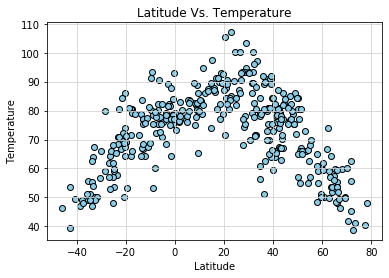

In [13]:
plt.scatter(lats,max_temp,edgecolors="black",facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude Vs. Temperature")
plt.grid(b = True, axis = "both", which = "major", linestyle="-", color="lightgrey")
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

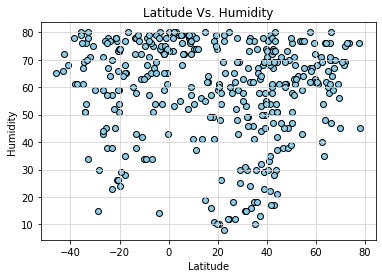

In [14]:
plt.scatter(lats,humidity,edgecolors="black",facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude Vs. Humidity")
plt.grid(b = True, axis = "both", which = "major", linestyle="-", color="lightgrey")
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Cloudiness Plot

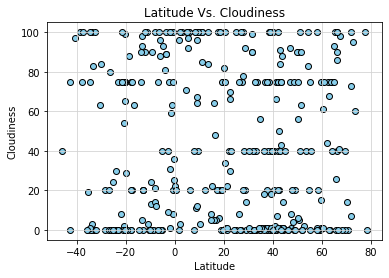

In [15]:
plt.scatter(lats,clean_city_data["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude Vs. Cloudiness")
plt.grid(b = True, axis = "both", which = "major", linestyle="-", color="lightgrey")
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Wind Speed Plot

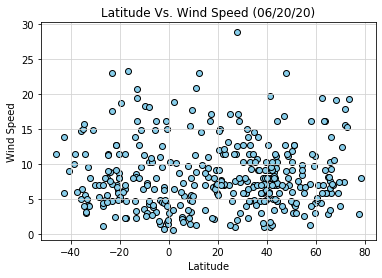

In [16]:
plt.scatter(lats,clean_city_data["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude Vs. Wind Speed (06/20/20)")
plt.grid(b = True, axis = "both", which = "major", linestyle="-", color="lightgrey")
plt.savefig("output_data/Fig1.png")
plt.show()